In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests

data = requests.get("https://api.opendota.com/api/matches/3846746975").json()

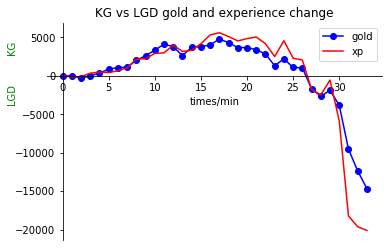

In [53]:
gold_change = pd.Series(data['radiant_gold_adv'])
xp = pd.Series(data['radiant_xp_adv'])
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
l1,=ax1.plot(gold_change.index,gold_change.values,color="b",marker='o')
l2,=ax1.plot(xp.index,xp.values,color="r")
ax1.spines['top'].set_color('none')#去除上边框线
ax1.spines['right'].set_color('none')#去除右边框
ax1.set_xlabel("times/min")
ax1.text(-6,3600,"KG",rotation=90,fontsize=10,color='g')
ax1.text(-6,-2000,"LGD",rotation=90,fontsize=10,color='g')
ax1.spines['bottom'].set_position(('data', 0))
ax1.spines['left'].set_position(('data', 0))
ax1.set_title("KG vs LGD gold and experience change")
ax1.legend(handles=[l1,l2],labels=["gold","xp"],loc='best')
plt.show()

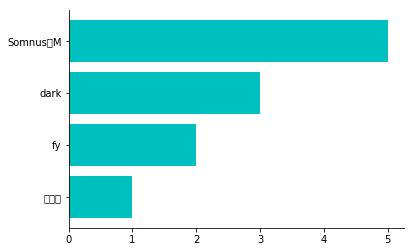

In [62]:
laye = {}#拉野
for i in data["players"]:
    laye[i['name']]=i['camps_stacked']
la = pd.Series(laye)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
a=la.sort_values(ascending=True)
b=a[a.values>0]
names = [i for i in b.index]
haha =pd.Series(names)
ax2.spines['top'].set_color('none')#去除上边框线
ax2.spines['right'].set_color('none')#去除右边框
ax2.set_yticklabels(haha.values)
ax2.set_yticks(haha.index)
ax2.barh(haha.index,b.values,color='c')
plt.show()